<a href="https://colab.research.google.com/github/xiaobo-fu/python_for_finance/blob/master/python_for_finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "/content/gdrive/My Drive/G/ML/"
CHAPTER_ID = "python_for_finance"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if not os.path.isdir(IMAGES_PATH):
        os.makedirs(IMAGES_PATH)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2138 entries, 2010-01-04 to 2018-06-29
Data columns (total 1 columns):
.SPX    2138 non-null float64
dtypes: float64(1)
memory usage: 33.4 KB


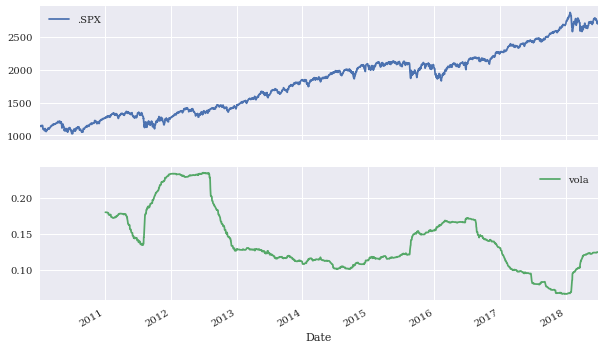

In [40]:
import numpy as np
import pandas as pd
from pylab import plt, mpl

plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

data = pd.read_csv('/content/gdrive/My Drive/G/ML/python_for_finance/source/tr_eikon_eod_data.csv',
index_col=0, parse_dates=True)
data = pd.DataFrame(data['.SPX'])
data.dropna(inplace=True)
data.info()

data['rets'] = np.log(data / data.shift(1))
data['vola'] = data['rets'].rolling(252).std() * np.sqrt(252)
data[['.SPX', 'vola']].plot(subplots=True, figsize=(10, 6));

In [0]:
import numpy as np
import pandas as pd

data = pd.read_csv('/content/gdrive/My Drive/G/ML/python_for_finance/source/tr_eikon_eod_data.csv',
index_col=0, parse_dates=True)


In [0]:
data = pd.DataFrame(data['AAPL.O'])
data['Returns'] = np.log(data / data.shift())
data.dropna(inplace=True)
lags = 6
cols = []
for lag in range(1, lags + 1):
    col = 'lag_{}'.format(lag)
    data[col] = np.sign(data['Returns'].shift(lag))
    cols.append(col)
data.dropna(inplace=True)

In [211]:
data.head()

,AAPL.O,Returns,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6
Date,,,,,,,,
2010-01-13,30.092827,0.014007,-1.0,-1.0,1.0,-1.0,-1.0,1.0
2010-01-14,29.918542,-0.005808,1.0,-1.0,-1.0,1.0,-1.0,-1.0
2010-01-15,29.418542,-0.016853,-1.0,1.0,-1.0,-1.0,1.0,-1.0
2010-01-20,30.246398,-0.015536,-1.0,-1.0,1.0,-1.0,-1.0,1.0
2010-01-21,29.724542,-0.017404,-1.0,-1.0,-1.0,1.0,-1.0,-1.0


In [197]:
from sklearn.svm import SVC

model = SVC(gamma='auto')
model.fit(data[cols], np.sign(data['Returns']))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [203]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(data[cols], np.sign(data['Returns']))

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

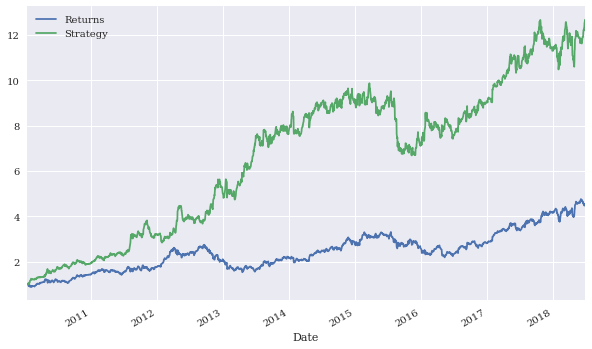

In [206]:
data['Prediction'] = model.predict(data[cols])
data['Strategy'] = data['Prediction'] * data['Returns']
data[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(
figsize=(10, 6));

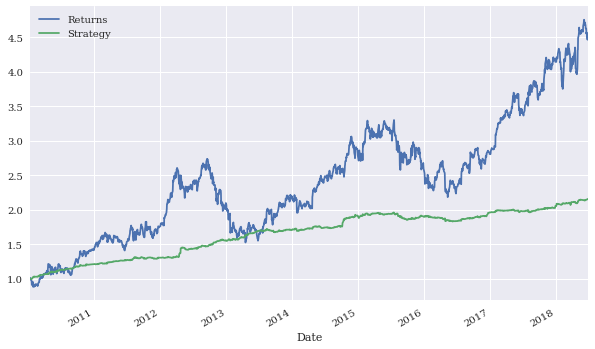

In [207]:
data['Prediction'] = tree_reg.predict(data[cols])
data['Strategy'] = data['Prediction'] * data['Returns']
data[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(
figsize=(10, 6));

In [0]:
series = """
'01/18/2014 13:00:00', 100, '1st';
'01/18/2014 13:30:00', 110, '2nd';
'01/18/2014 14:00:00', 120, '3rd'
"""

In [232]:
series

"\n'01/18/2014 13:00:00', 100, '1st';\n'01/18/2014 13:30:00', 110, '2nd';\n'01/18/2014 14:00:00', 120, '3rd'\n"

In [0]:
import re

In [0]:
dt = re.compile("'[/:\s]+'")

In [233]:
result = dt.findall(series)
result

[]